In [2]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import subprocess
%autoreload 2
import importlib 


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



UsageError: Line magic function `%autoreload` not found.


# Computation of the lensing bands

In [36]:
%time !python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  6250000
Number of points in the n=1 grid  6250000
Number of points in the n=2 grid  6250000
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 346 ms, sys: 64.3 ms, total: 410 ms
Wall time: 37.5 s


## Reading the output of the lensing bands calculation

In [3]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


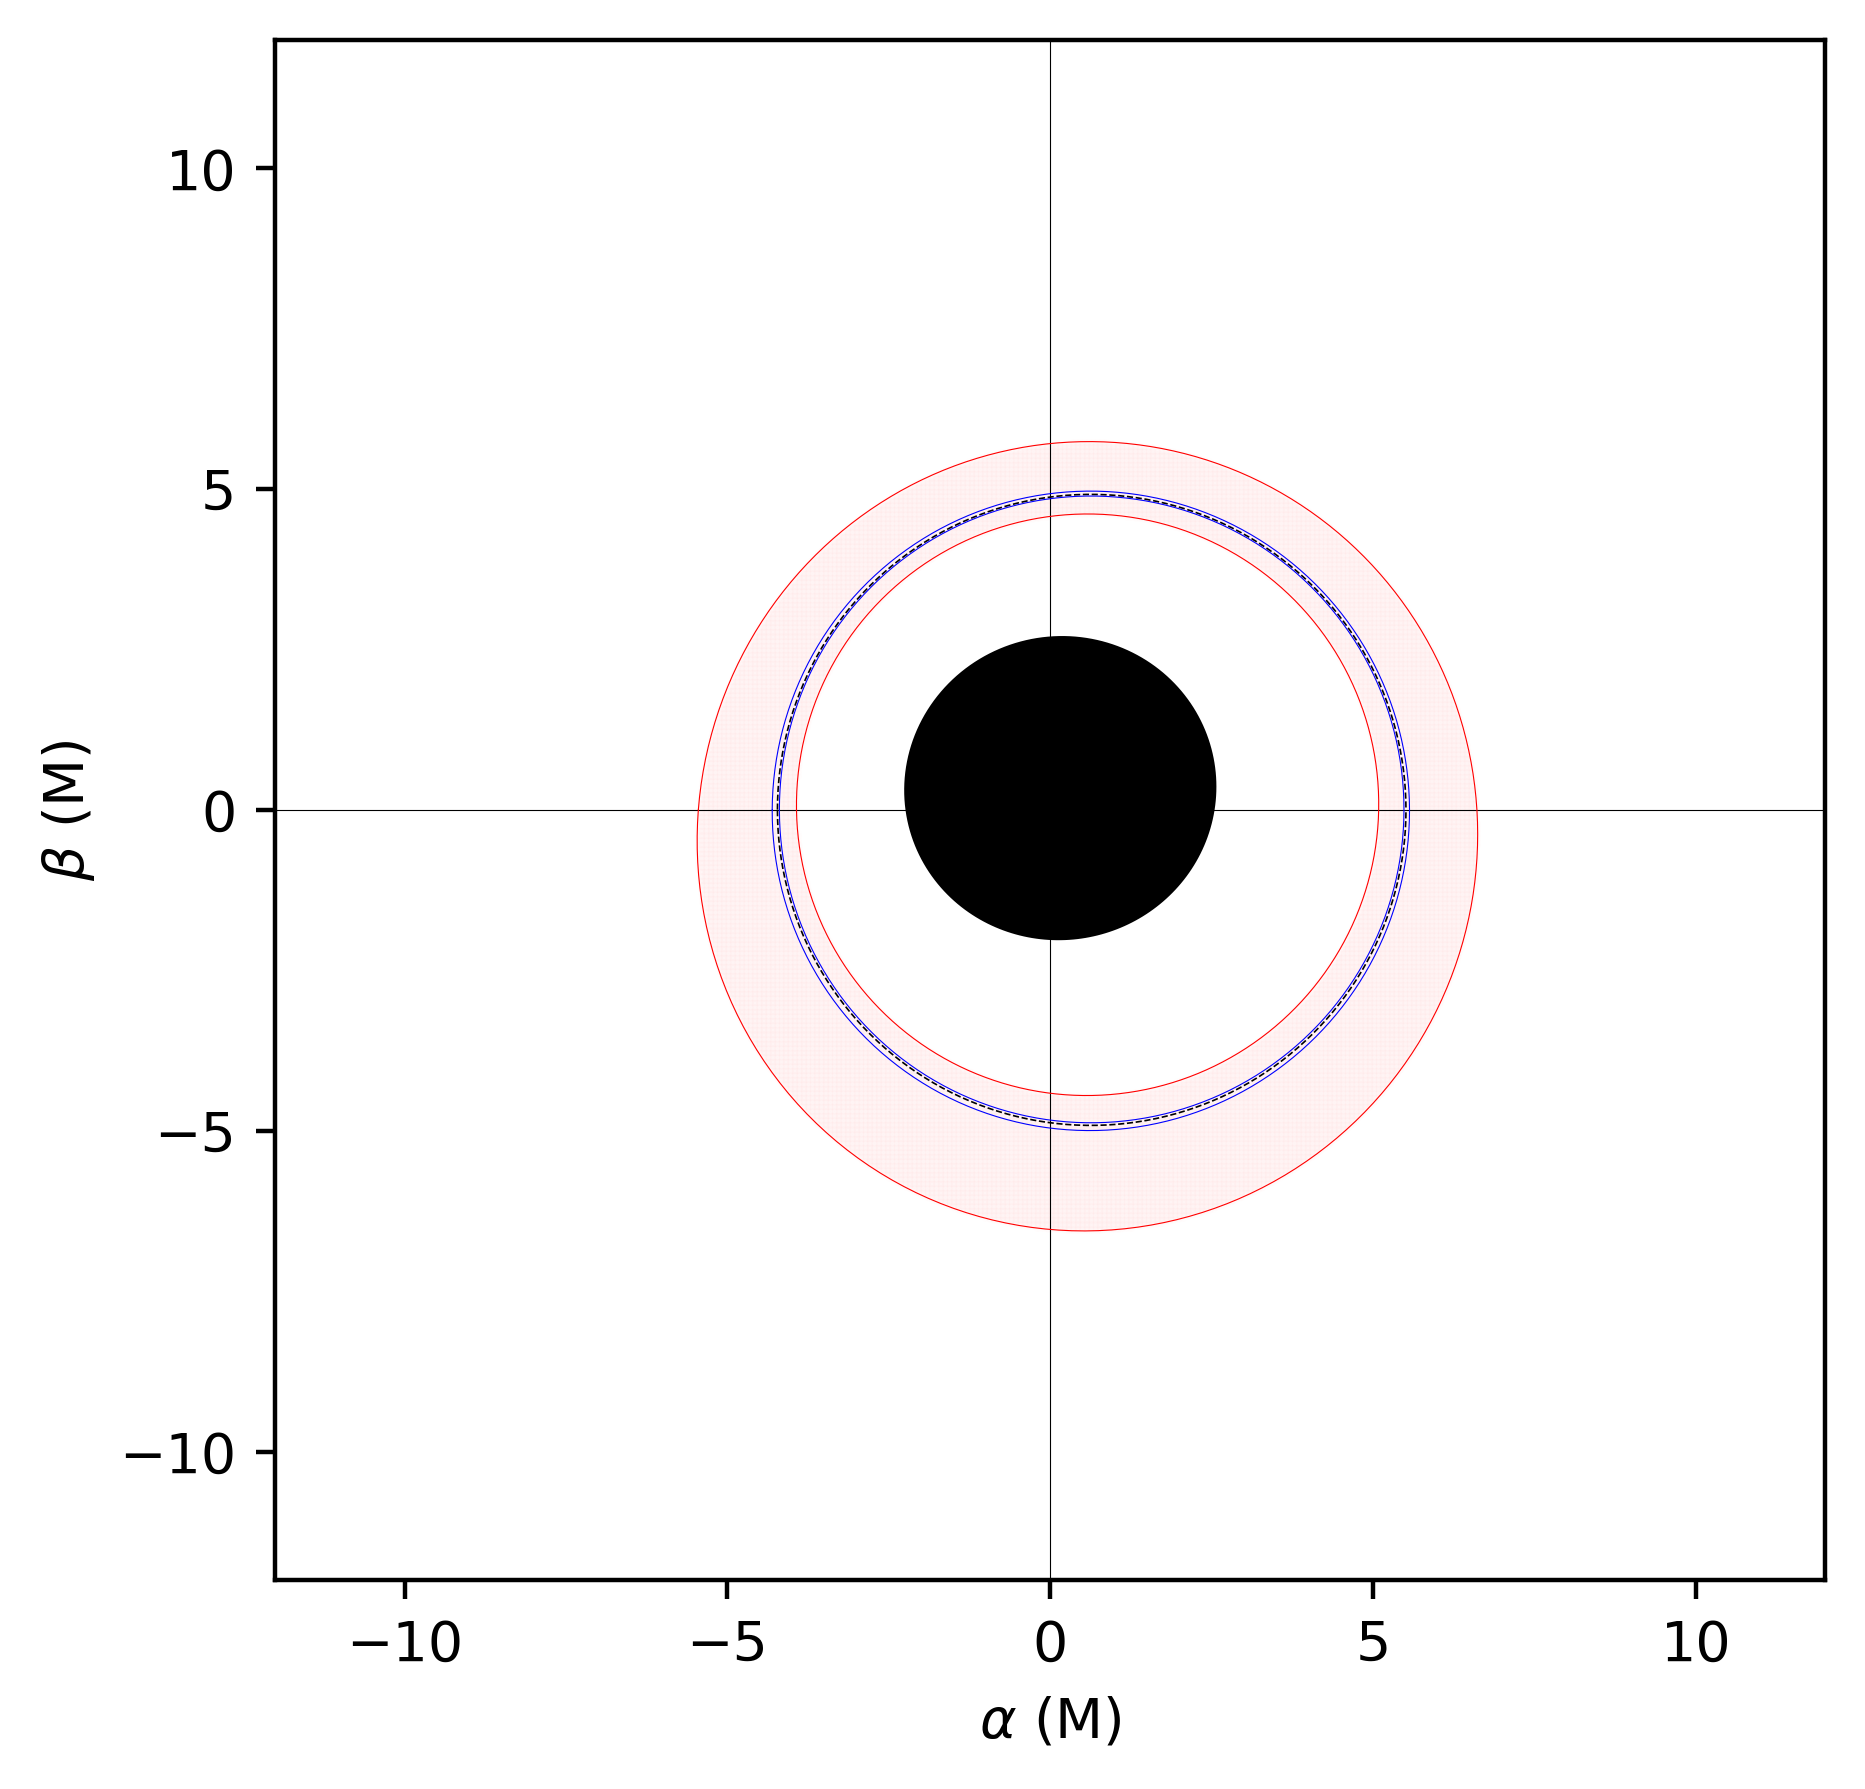

In [4]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

# Analytical Ray-tracing

In [39]:
%time !python3 raytracing.py



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 18750000 photons were ray-traced
CPU times: user 785 ms, sys: 113 ms, total: 899 ms
Wall time: 1min 6s


### Reading the output of the ray-tracing

In [5]:
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]

h5f.close()

Reading file:  ./Results/Rays_a_0.94_i_17.h5


## Plotting the $r$ and $\phi$ values of the n=0 band

Text(0, 0.5, '$\\beta$ (M)')

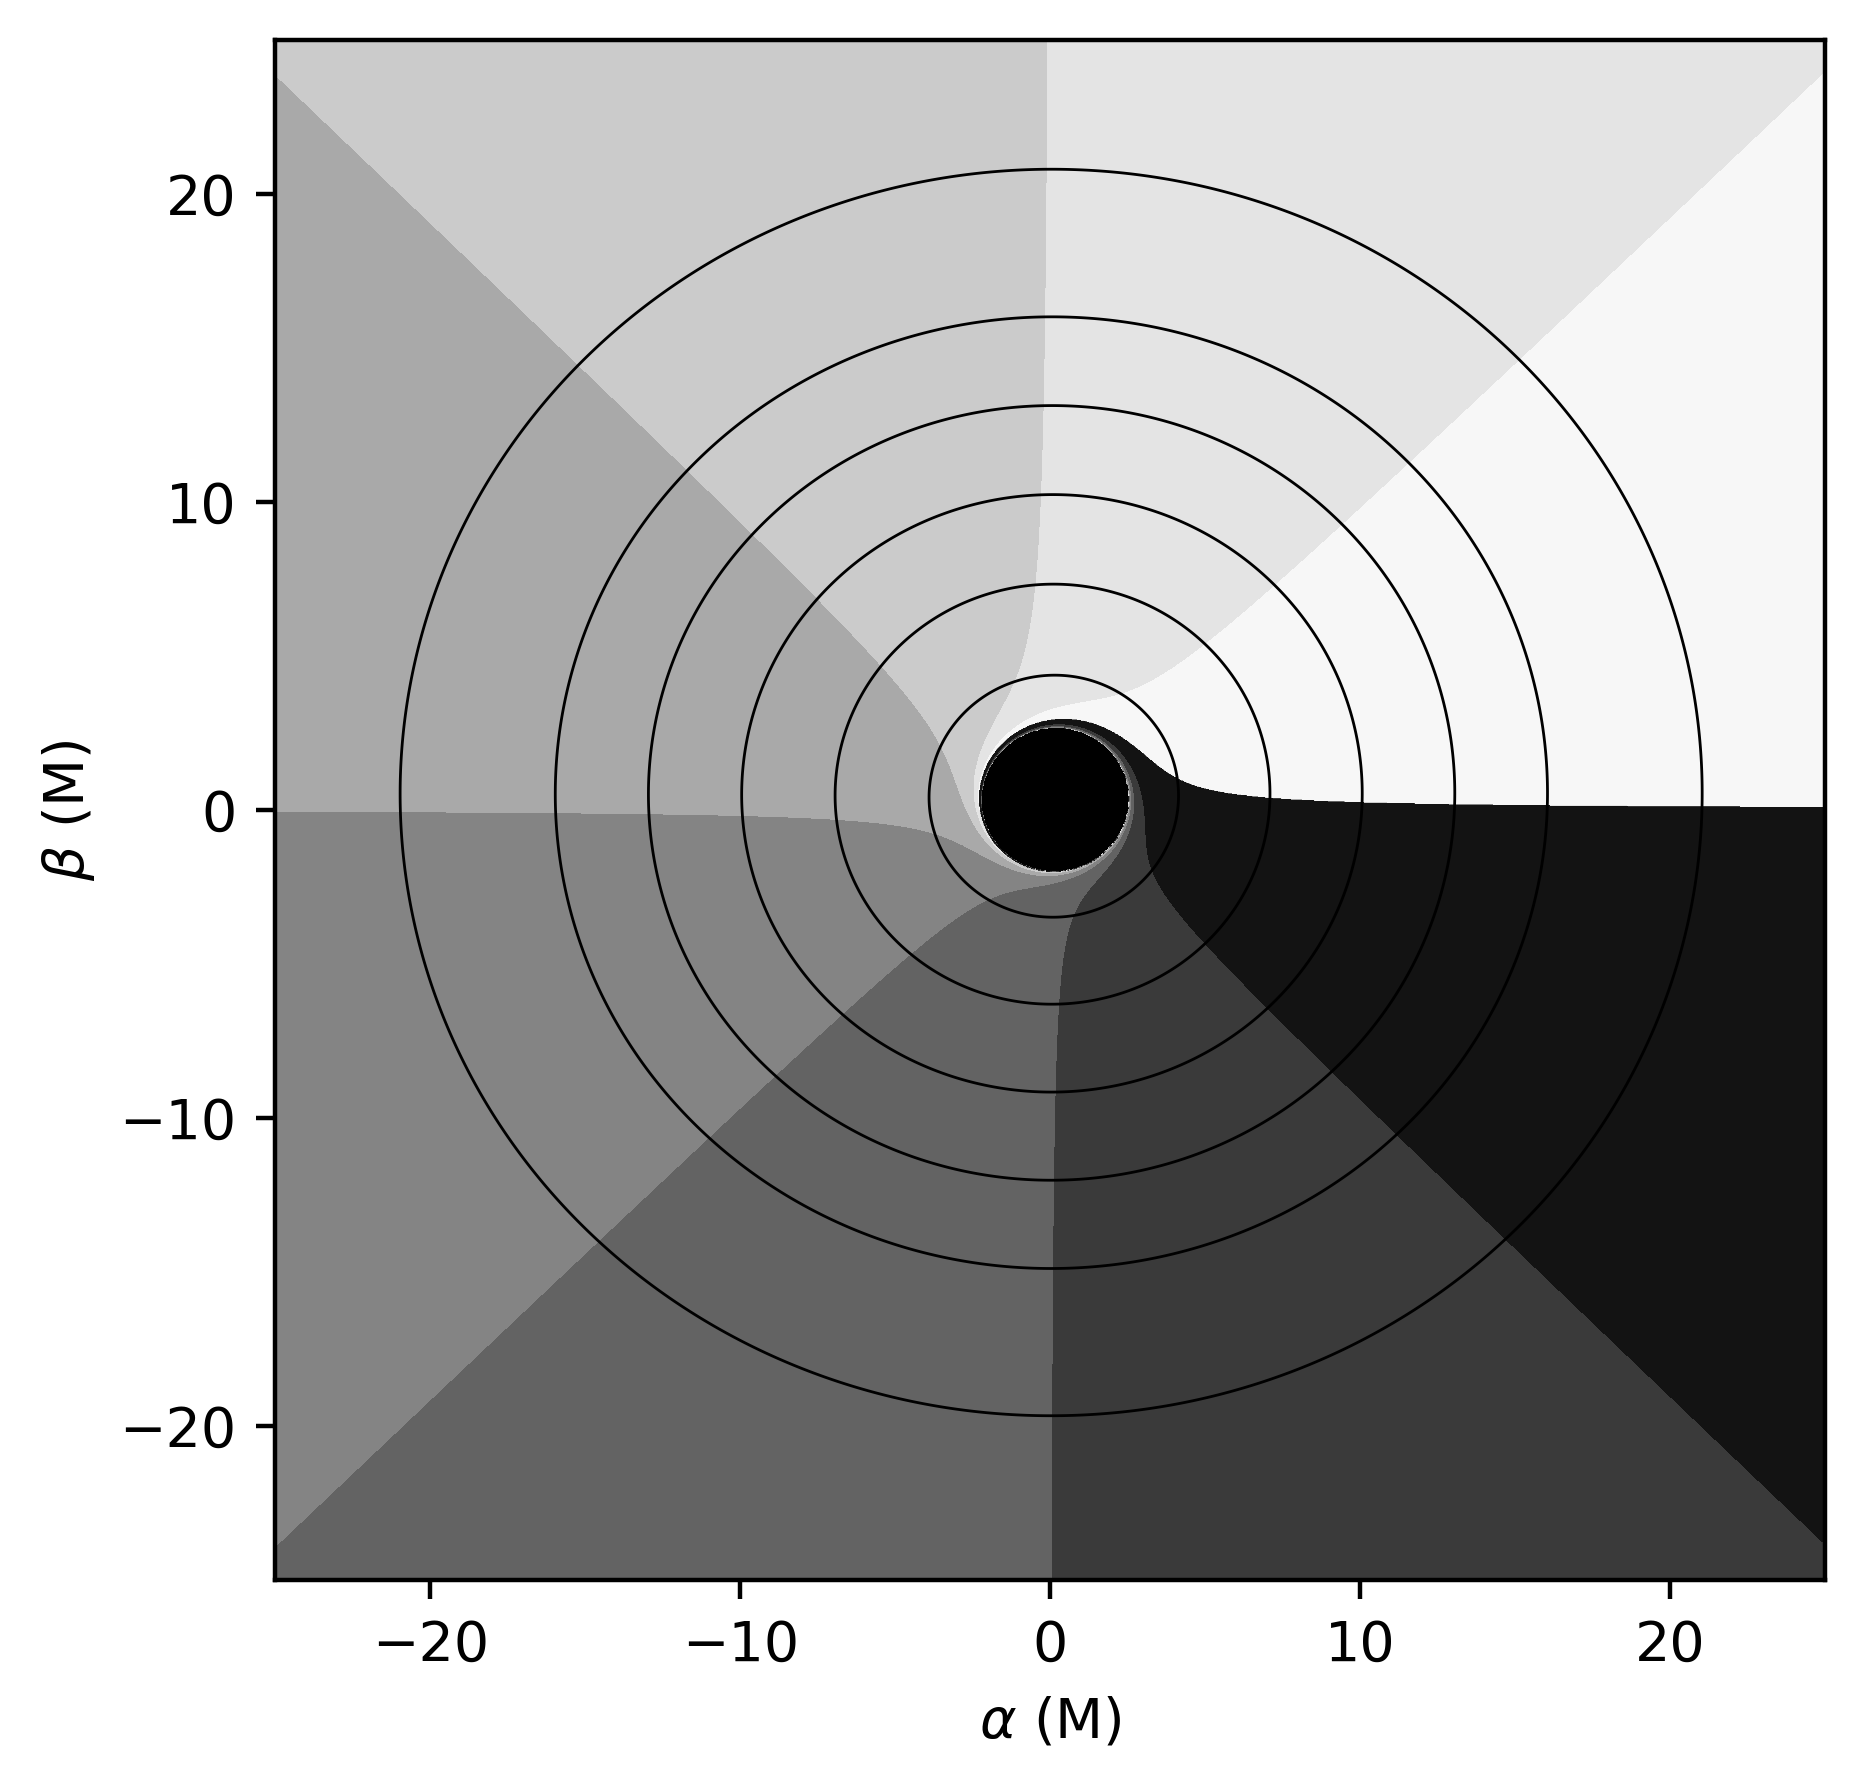

In [41]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)
        
CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('Rays.png',dpi=400,bbox_inches='tight')

# Computing images

In [190]:
args = ' '
cmd_args = [
   	'--nu ',
	'--mass ',
	'--scaleh ',
	'--thetab ',
	'--beta ',
	'--rb0 ',
	'--nth0 ',
	'--te0 ',
	'--pdens ',
	'--ptemp ' 
]
brightparams = [
	230e9, # nu0
	1.989e42, # mass
	.5, # scale_height
	60.0 * (np.pi / 180), # theta_b
	1.0, # beta
	60.0, # rb_0
	1.23e4, # n_th0
	8.1e9, # t_e0
	-.7, # p_dens
	-.84 # p_temp
]
for i in range(len(brightparams)):
    args = args + cmd_args[i] + str(brightparams[i]) + ' '
aartpath = '/home/tej/Desktop/Code_Stuff/Repositories/aart'

In [188]:
subprocess.run(['python3 ' + aartpath + '/radialintensity.py' + args], shell=True)


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
File  ./Results/Intensity_a_0.94_i_17_nu_2.3e+11_mass_2.0e+42_scaleh_60.0_thetab_1.047e+00_beta_1.0e+00_rb_6.0e+01_nth0_1.2e+04_te0_8.1e+09_pdens_-7.0e-01_ptemp_-8.4e-01.h5  created.


CompletedProcess(args=['python3 /home/tej/Desktop/Code_Stuff/Repositories/aart/radialintensity.py --nu 230000000000.0 --mass 1.989e+42 --scaleh 60 --thetab 1.0471975511965976 --beta 1 --rb0 60 --nth0 12300.0 --te0 8100000000.0 --pdens -0.7 --ptemp -0.84 '], returncode=0)

In [191]:
fnrays='./Results/Intensity_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.h5'.format(
    spin_case,i_case,"{:.1e}".format(brightparams[0]),"{:.1e}".format(brightparams[1]), brightparams[2],
    "{:.3e}".format(brightparams[3]), "{:.1e}".format(brightparams[4]),"{:.1e}".format(brightparams[5]), "{:.1e}".format(brightparams[6]),
    "{:.1e}".format(brightparams[7]),"{:.1e}".format(brightparams[8]),"{:.1e}".format(brightparams[9]))

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Intensity_a_0.94_i_17_nu_2.3e+11_mass_2.0e+42_scaleh_60.0_thetab_1.047e+00_beta_1.0e+00_rb_6.0e+01_nth0_1.2e+04_te0_8.1e+09_pdens_-7.0e-01_ptemp_-8.4e-01.h5


(array([[2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([0.00000000e+00, 2.09836418e-32, 4.19672835e-32, 6.29509253e-32,
        8.39345671e-32, 1.04918209e-31, 1.25901851e-31, 1.46885492e-31,
        1.67869134e-31, 1.88852776e-31, 2.09836418e-31]),
 <a list of 2500 BarContainer objects>)

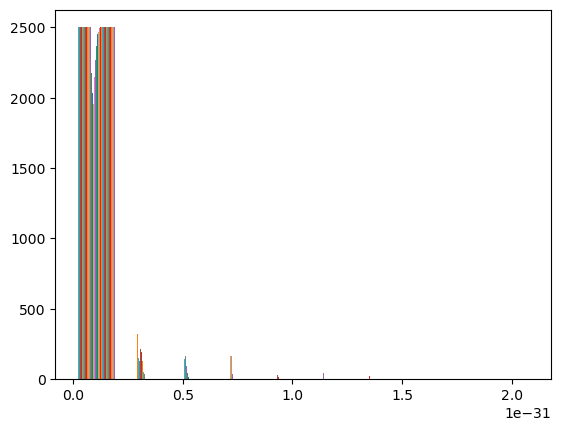

In [176]:
plt.hist(I0+I1+I2)

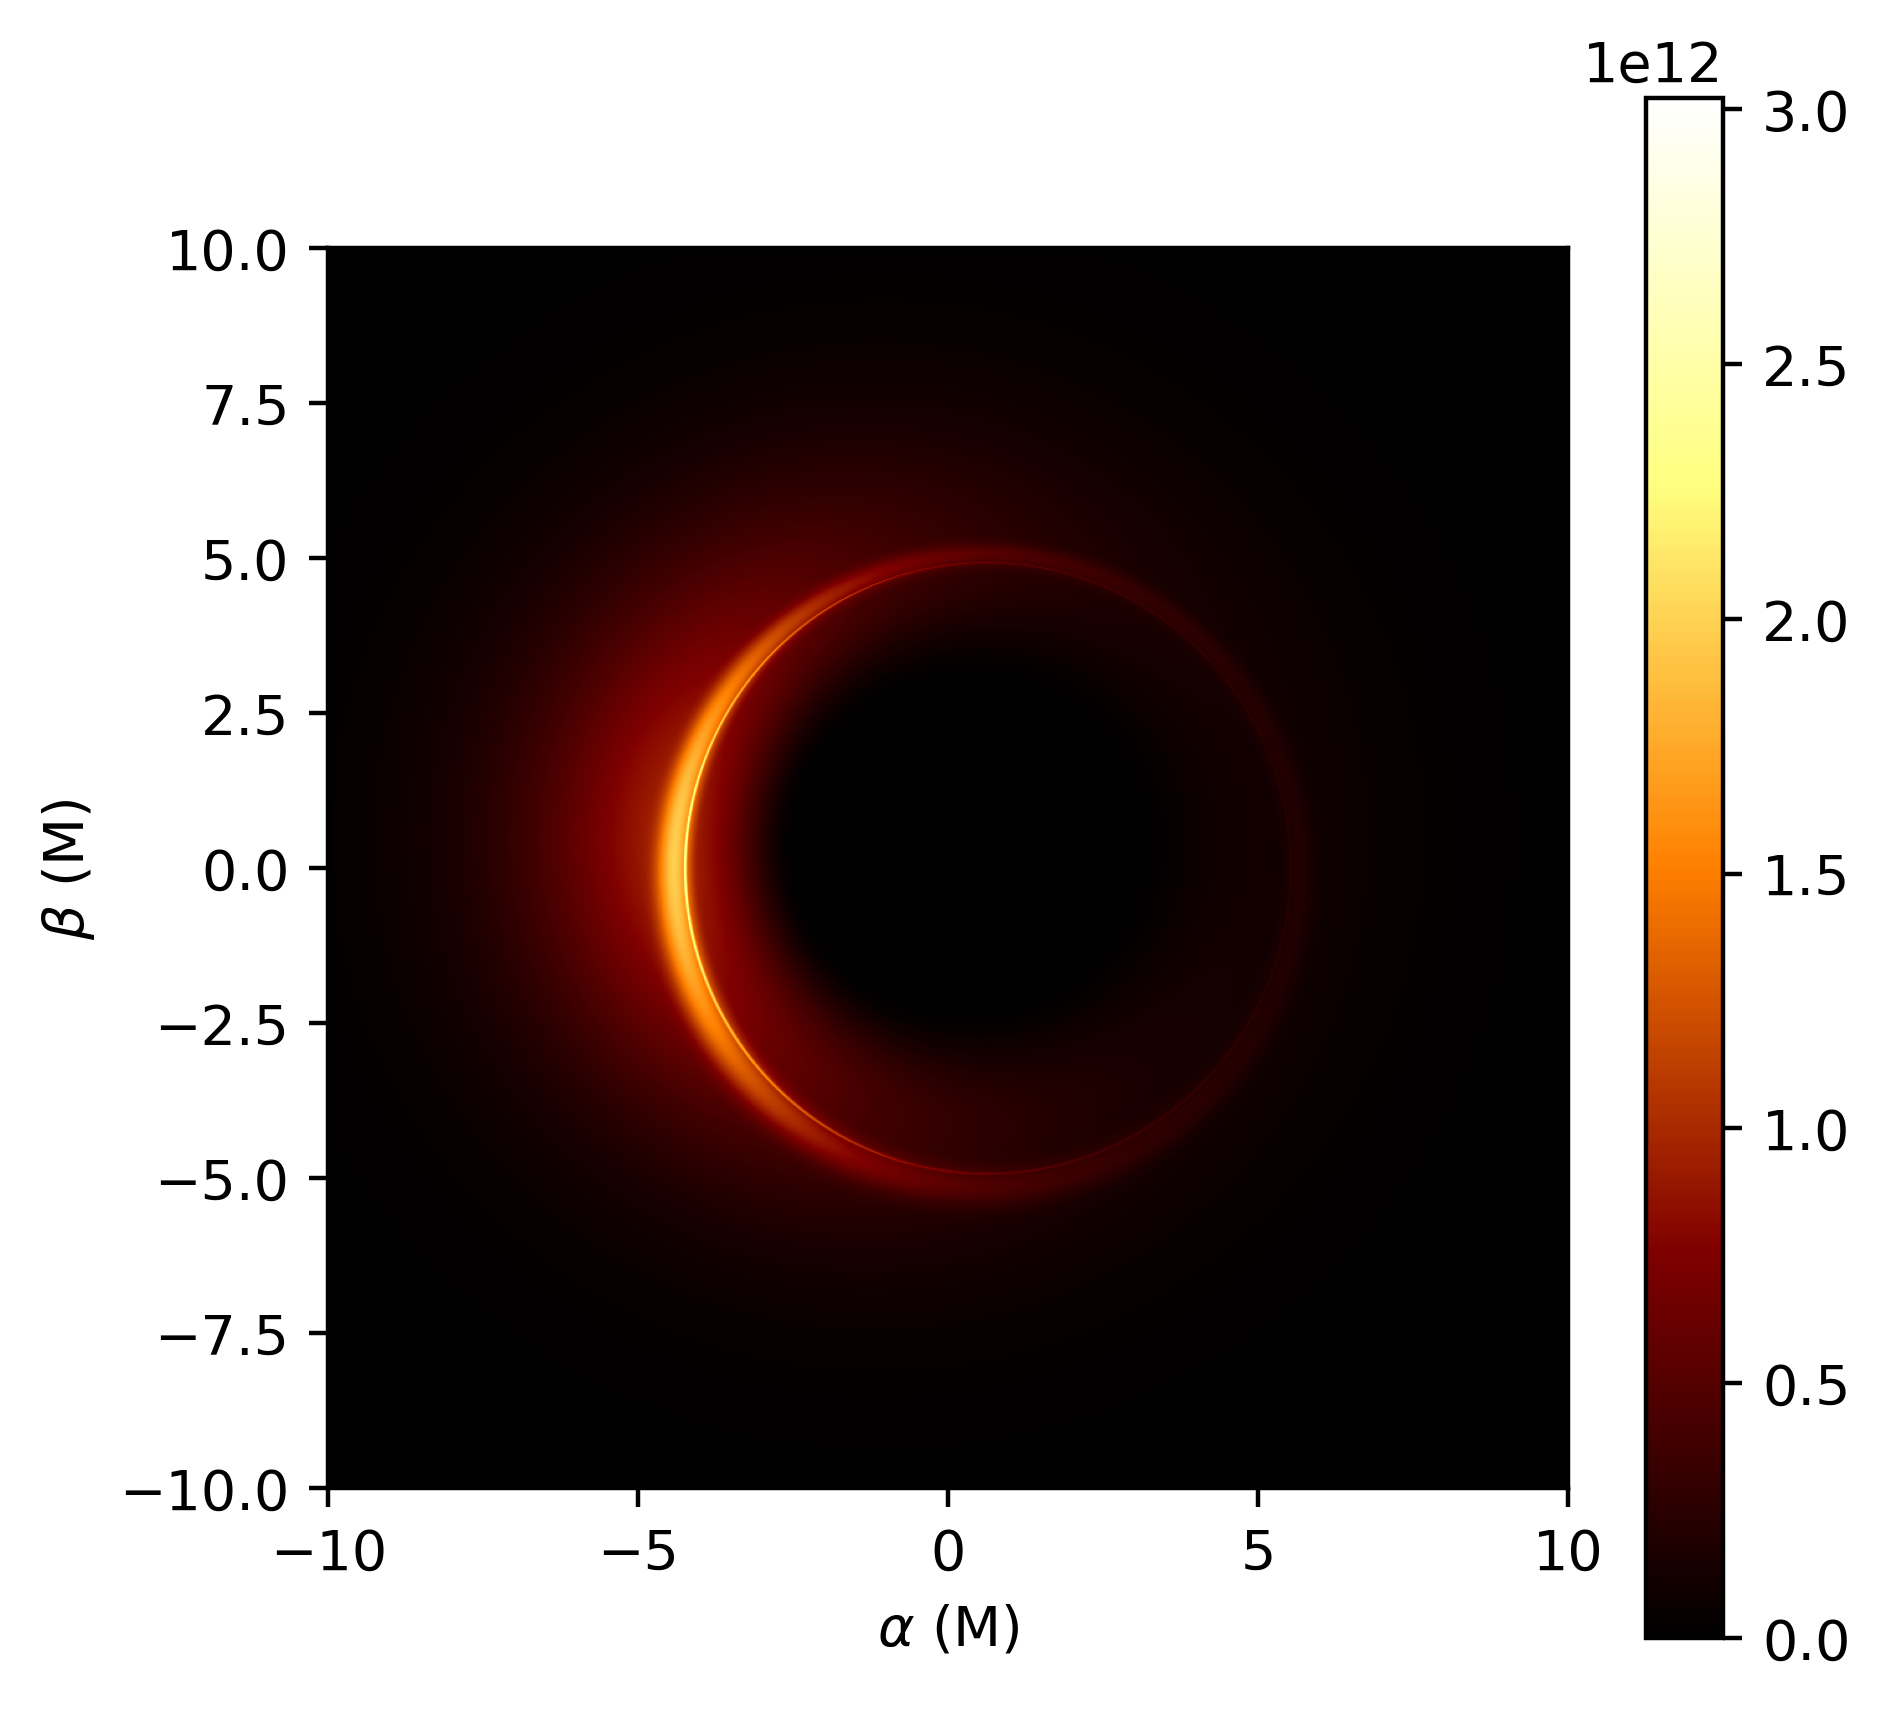

In [192]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)
# TODO: Shrink colorbar
# TODO: Try subplots maybe
im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow((I0+I1+I2)/1e9,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(blurred,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
    
ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")
#ax.text(-9,8.5, "Hi!", fontsize = 12, color='w')


plt.colorbar(im)
# plt.savefig('BHImage_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_rb0_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.png'.format(
#     spin_case,i_case,"{:.1e}".format(brightparams[0]),"{:.1e}".format(brightparams[1]), brightparams[2],
#     "{:.3e}".format(brightparams[3]), "{:.1e}".format(brightparams[4]),"{:.1e}".format(brightparams[5]), "{:.1e}".format(brightparams[6]),
#     "{:.1e}".format(brightparams[7]),"{:.1e}".format(brightparams[8]),"{:.1e}".format(brightparams[9])),dpi=400,bbox_inches='tight')
        

plt.show()

In [15]:
import skimage.filters

In [21]:
sigma = 10.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    (I0+I1+I2)/1e9, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)

In [ ]:
# TODO Full pixel value bar. 10e9 K r=2 temp 

In [106]:
# TODO 10Ghz to 345 GHz in steps of 5 GHZ movie.
# TODO Use a loop to do this

60

In [30]:
print("{:.1e}".format(230e9))

2.3e+11


In [91]:
(1 * u.dimensionless_unscaled) ** 2

<Quantity 1.>

In [94]:
rg = ilp.rg_func(ilp.ilp.kw_mass)
rb = ilp.rb_func(ilp.ilp.kw_mass)
print((10 * rg / rb) ** ilp.ilp.kw_p_b)

1.0


In [ ]:
print(sys.path.append(os.getcwd()))
print(sys.path)
os.getcwd()

In [61]:

for i in range(1e3,3001,1000):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer

In [62]:
type(int(1e9))

int

In [186]:
int(1e9)

1000000000

In [149]:
label=np.zeros([10,3], dtype=object)
label[:,0] = [
	r"$\nu= $",
	'BlkHole Mass= ',
	'Scale Height= ',
	r'$\theta_b= $',
	r'$\beta= $',
	r'$R_b= $',
	r'$n_{th,0}= $',
	r'$T_{e,0}= $',
	r'$p_{dens}= $',
	r'$p_{temp}= $' 	
]
label[:,1] = [
	1e9, # GHz
	1e9*(1.989e33), # Billion Solar Masses
	1, # Rg
	1, # Rads
	1,
	1, # Rg
	1/1e6, # 1/m^3
	1e9, # GK
	1,
	1	
]
label[:,2] = [
	'GHz', # GHz
	r'Billion $M_{\odot}$', # Billion Solar Masses
	r'$R_g$', # Rg
	'Rads', # Rads
	'',
	r'$R_g$', # Rg
	r'$1/m^{3}$', # 1/m^3
	'GK', # GK
	'',
	''	
]

In [199]:
range(0,1,1)
start = 1
end = 10
step = .4
print((end-start)/step)
range(int((end-start)/step))


22.5


range(0, 22)